In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy 
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

In [4]:
pip install scipy



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/3.4.5/libexec/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install stats


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/3.4.5/libexec/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Scenario 1

One- Proportion Testing

In [2]:
count =28
nobs = 94
value = .5
stat, pval = proportions_ztest(count, nobs, value)
print(stat,pval)

-4.285155086172975 1.826117558940689e-05


Significant, there is fraud being done

## Scenario 2

Independent chisquare

In [10]:
Antiseptics= pd.read_csv('/Users/korigray/Desktop/Data-Science-Program/DS105-Intermediate Stats/L10/antiseptics.csv')
Antiseptics.head()

Clinic Antiseptic Type   Number of applications
0       1                A                      22
1       1                B                      71
2       1                C                       8
3       1                D                      49
4       2                A                      38

In [11]:
Antiseptics.rename(columns={'Antiseptic Type ': "AS", "Number of applications": "Count"}, inplace=True)

In [12]:
Antiseptics_pivot = pd.pivot_table(Antiseptics,index='AS',columns='Clinic',values="Count")
Antiseptics_pivot

Clinic   1    2    3
AS                  
A       22   38   84
B       71  112  298
C        8   14   37
D       49   69  182

In [13]:
stats.chi2_contingency(Antiseptics_pivot)

Chi2ContingencyResult(statistic=1.225920250023835, pvalue=0.9755850789571424, dof=6, expected_freq=array([[ 21.95121951,  34.09756098,  87.95121951],
       [ 73.32317073, 113.8953252 , 293.78150407],
       [  8.99390244,  13.97052846,  36.03556911],
       [ 45.73170732,  71.03658537, 183.23170732]]))

No siginificants 

## Scenario 3

In [17]:
savings = pd.read_csv("/Users/korigray/Desktop/Data-Science-Program/DS105-Intermediate Stats/L10/savings.zip")
savings.head()

Group A   Group B   Group C   Group D
0  21383.06  17077.54  13636.38  14582.73
1  19729.92  17258.06   5156.36  12880.28
2  24071.53  20652.91   4446.92  16412.72
3  19056.28  20845.06   4892.59  14020.00
4  19147.18  22296.64  14099.38  16467.70

In [18]:
savings_expanded=pd.melt(savings,var_name='Group', value_name='$')

In [19]:
savings_expanded


Group         $
0    Group A  21383.06
1    Group A  19729.92
2    Group A  24071.53
3    Group A  19056.28
4    Group A  19147.18
..       ...       ...
227  Group D  12180.86
228  Group D  12972.11
229  Group D  12068.83
230  Group D  16064.42
231  Group D  10884.26

[232 rows x 2 columns]

In [20]:
savings_expanded = savings_expanded.replace(savings.columns, [0,1,2,3])
savings_expanded.head()

Group         $
0      0  21383.06
1      0  19729.92
2      0  24071.53
3      0  19056.28
4      0  19147.18

### Plot Dependent Variable

/var/folders/58/w1zyx47n4n535hjht6vsjd240000gn/T/ipykernel_10927/1912261235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(savings_expanded['Group'])


<AxesSubplot: xlabel='Group', ylabel='Density'>

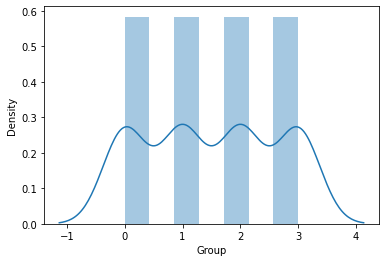

In [39]:
sns.distplot(savings_expanded['Group'])


In [40]:
savings_expanded['GroupSQRT'] = np.sqrt(savings_expanded['Group'])


In [49]:
scipy.stats.bartlett(savings_expanded['GroupSQRT'], savings_expanded['$R'])


KeyError: '$R'

## Scenario 4

Two proportion z test

In [60]:
count =np.array([374,129])
nobs =np.array([171,74])
stat, pval = proportions_ztest(count, nobs)
print(stat,pval)

nan nan


No difference at all 